# Group Member Names
(Double-click here and update your group member names below. Remember to keep the `*` symbols for bullet points. Hit  shift+enter when you're done to render the Markdown.)
* Abra
* Tyr
* Mirra
* Olea
* Soren

In [78]:
# Your first cell of code. Notice that the pull-down menu says "Code"
# when you double-click on this cell. If you double-click the first cell again, you'll see "Markdown"
# In code, stuff that comes after a hashtag symbol is a comment, and is ignored.
#
# But the next couple of lines here need to be run for the rest of this lab to work.
# Be sure to run this cell by hitting shift+enter like you did above for the Markdown cell,
# or by clicking the "Run" button above.

import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
speedoflight = 3e8 # ms^-1

# Problem 1 - Convert frequency to wavelength
Petty problem 2.1 wasn't too bad, but we can do better by automating it.

In [92]:
band_names = ['WFIU1', 'Ka band Police Scanner', 'red', 'violet', 'UV-c', 'x-ray', 'gamma ray'] 
band_frequencies = np.array([101.9e6, 35e9, 4.5e14, 7.5e14, 1.5e15, 3e17, 3e19]) # in Hz or s^-1
print('-----------------------------------')
print("{:23}| Frequency".format('Description'))
print('-----------------------------------')
for iName, iFreq in zip(band_names,band_frequencies):
    iFreqSci="{:.1e} Hz".format(iFreq)
    iNameLong ="{:23}| ".format(iName)
    print(iNameLong + iFreqSci)
print('-----------------------------------')

-----------------------------------
Description            | Frequency
-----------------------------------
WFIU1                  | 1.0e+08 Hz
Ka band Police Scanner | 3.5e+10 Hz
red                    | 4.5e+14 Hz
violet                 | 7.5e+14 Hz
UV-c                   | 1.5e+15 Hz
x-ray                  | 3.0e+17 Hz
gamma ray              | 3.0e+19 Hz
-----------------------------------


In [180]:
def freq_to_wave(input_frequency):
    output_wavelength = np.arange(len(input_frequency))+1 # replace the right-hand-side with an expression for wavelength
    return(output_wavelength)

band_wavelengths = freq_to_wave(band_frequencies)
print('-----------------------------------')
print("{:23}| CHANGE ME".format('Description'))
print('-----------------------------------')
for iName, iWave in zip(band_names,band_wavelengths):
    iWaveSci="{:.1e} m".format(iWave)
    iNameLong ="{:23}| ".format(iName)
    print(iNameLong + iWaveSci)
print('-----------------------------------')

-----------------------------------
Description            | CHANGE ME
-----------------------------------
WFIU1                  | 1.0e+00 m
Ka band Police Scanner | 2.0e+00 m
red                    | 3.0e+00 m
violet                 | 4.0e+00 m
UV-c                   | 5.0e+00 m
x-ray                  | 6.0e+00 m
gamma ray              | 7.0e+00 m
-----------------------------------


Text(0, 0.5, 'Wavelength (m)')

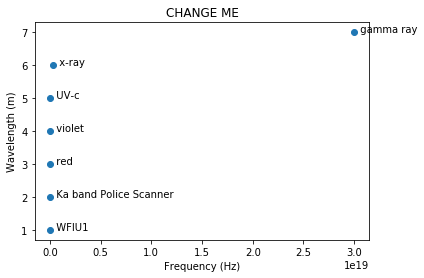

In [81]:
plt.plot(band_frequencies, band_wavelengths, 'o')
for iName, iFreq, iWave in zip(band_names, band_frequencies, band_wavelengths):
    plt.text(iFreq, iWave, "  {}".format(iName))
plt.title("CHANGE ME")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Wavelength (m)")
# Uncomment the lines below to change this to a log-log plot
#plt.yscale("log") 
#plt.xscale("log")

You can check your answers against this image below.
![](https://external-content.duckduckgo.com/iu/?u=http://www.sengpielaudio.com/SpectrumOfElectromagneticRadiation.gif)

# Problem 2 - Convert wavelength to frequency
Of course, we can go the other way, too.

In [178]:
obj_names = ['Aerosol Particle', 'Cloud Droplet', 'Rain Drop', 'Military Drone']
obj_magnitudes = np.array([-7, -5, -3, 1])
print('----------------------------')
print("{:17}| Magnitude".format('Object'))
print('----------------------------')
for iName, iMag in zip(obj_names, obj_magnitudes):
    iMagSci="10^({:}) m".format(iMag)
    iNameLong ="{:17}| ".format(iName)
    print(iNameLong + iMagSci)
print('----------------------------')

----------------------------
Object           | Magnitude
----------------------------
Aerosol Particle | 10^(-7) m
Cloud Droplet    | 10^(-5) m
Rain Drop        | 10^(-3) m
Military Drone   | 10^(1) m
----------------------------


Light interacts with objects differently, depending on their size relative to the wavelength of the light. If the object is _much_ larger than the wavelength, geometric objects come into play. If the object is _much_ smaller than the wavelength, it does what we call Rayleigh scattering. If the object is similar in size to the wavelength, it does what we call "mie" scattering.

![Optical Regimes](https://external-content.duckduckgo.com/iu/?u=http%3A%2F%2F2016.igem.org%2Fwiki%2Fimages%2F4%2F46%2FT--TU_Delft--Scattering_regimes.png&f=1&nofb=1)

In the above figure, $x$ is the ratio of object size to wavelength.

Using the cell below, print the frequency of light for which each of the object is clearly within its mie scattering regime. _Hint: You don't need the figure above. You just need to calculate the frequency of light corresponding to a wavelength as big as the object._

In [181]:
def wave_to_freq(input_wavelength):
    output_frequency = np.arange(len(input_wavelength))+1 # replace the right-hand-side with an expression for frequency
    return(output_frequency)

obj_frequencies = wave_to_freq(10^obj_magnitudes)
print('--------------------------------')
print("{:17}| CHANGE ME".format('Object'))
print('--------------------------------')
for iName, iFreq in zip(obj_names,obj_frequencies):
    iFreqSci="{:.1e} Hz".format(iFreq)
    iNameLong ="{:17}| ".format(iName)
    print(iNameLong + iFreqSci)
print('--------------------------------')

--------------------------------
Object           | CHANGE ME
--------------------------------
Aerosol Particle | 1.0e+00 Hz
Cloud Droplet    | 2.0e+00 Hz
Rain Drop        | 3.0e+00 Hz
Military Drone   | 4.0e+00 Hz
--------------------------------


# Problem 3 - Calculating doppler shift

Radars use doppler shifting to calculate how quickly rain droplets are moving radially relative to the radar station. Petty problem #2.2 - the doppler shift for a moving observer and a stationary transmitter - gets you halfway there. The other half of the problem is the doppler shift for a moving transmitter and a stationary observer. The expression is slightly different:
$$f_o=\frac{f_t}{\left ( 1+\frac{\nu}{c} \right)}$$

In [220]:
color_names = ['near-infrared', 'red', 'orange', 'yellow', 'green', 'blue', 'indigo', 'violet', 'ultraviolet']
color_plotnames = color_names.copy()
color_plotnames[0] = 'black'
color_plotnames[-1] = 'gray'
color_wavelengths = np.array([1000, 710, 600, 550, 510, 450, 410, 390, 80])*1e-9
color_frequencies = wave_to_freq(color_wavelengths)
star_speeds = np.array([0.1, 1, 2, 2.5, 2.75, 2.875])*-1e8

def doppler_moving_tran(transmitted_frequency, transmitter_speed):
    observed_frequency = transmitted_frequency / (1 + transmitter_speed / speedoflight)
    #observed_frequency = transmitted_frequency / (1 + transmitter_speed / speedoflight)
    return(observed_frequency)

observed_frequencies = doppler_moving_tran(color_frequencies[np.newaxis,:], star_speeds[:, np.newaxis])

Text(0, 0.5, 'Speed of Emitting Star ($10^8$ms$^{-1}$)')

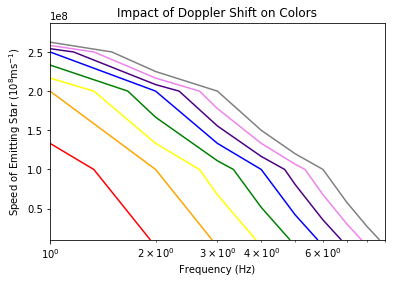

In [222]:
plt.contour(color_frequencies, -star_speeds, observed_frequencies, levels=color_frequencies, colors=color_plotnames)
plt.xscale("log")
plt.title("Impact of Doppler Shift on Colors")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Speed of Emitting Star ($10^8$ms$^{-1}$)")